In [1]:
#31-5-2020
#1-6-2020
#28-6-2020

%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd 
from scipy.optimize import curve_fit
import math
import scipy.optimize as optimization

path1="/opt/OPI/MachinePhysics/MachineDevelopment/mhuck/June29/SBplots/"
path2=['NBH/', 'WBH/' , 'WBL/' , 'NBL/']
NE=0
path=path1+path2[NE]



i=0
sys.path.append(path)

#odata=path+'orb_' + str(i)  + '.npy'
#bdata=path+'beam_'+ str(i)  + '.npy'

bdata=path+'_bmdtALL.txt'
odata=path+'_CODs_.npy'


Populating the interactive namespace from numpy and matplotlib


In [ ]:

gaps1=[22, 20, 17, 13.6, 11, 9, 8.05, 6]    # Orbit measured  at these gaps

# The gap order reveresed 
gaps2=gaps1[::-1]

#gaps2=[6, 8.05, 9, 11, 13.6, 17, 20, 22]

#..... Important ... change ....    *****************************
gaps=gaps1

foldno=['NBH/','WBH/','WBL/','NBL/']
### NBH :22 - 6  ,    WBH 6- 22,  WBL :22-6;    NBL : 6-22    ?????


In [2]:
#LOAD  DATA  ***********************

posi=numpy.loadtxt(path+'BPMPositions.txt')
bmdta=numpy.loadtxt(path+'_bmdtALL.txt')
ordta=numpy.load(path+'_CODs.npy')

In [9]:

NOBH=path1+"NBH/"+'_CODs.npy'
WIBH=path1+"WBH/"+'_CODs.npy'
NOBL=path1+"NBL/"+'_CODs.npy'
WIBL=path1+"WBL/"+'_CODs.npy'
 # to loade use:   numpy.load(fname)
NOBH_=numpy.load(NOBH)
WIBH_=numpy.load(WIBH)
NOBL_=numpy.load(NOBL)
WIBL_=numpy.load(WIBL)  


 #   actdata.append(actorbitdata['y'].mean(axis=0))

In [10]:
WIBL_.shape

(8, 109)

In [11]:
NOBH_y=NOBH_[:]['y']
WIBH_y=WIBH_[:]['y']
NOBL_y=NOBL_[:]['y']
WIBL_y=WIBL_[:]['y']

NOBH_sty=NOBH_[:]['yst']
WIBH_sty=WIBH_[:]['yst']
NOBL_sty=NOBL_[:]['yst']
WIBL_sty=WIBL_[:]['yst']


a=len(NOBH_y)      # Number of gaps
b=len(NOBH_y[0])   #  Number of of BPMS  


COD=np.zeros((a,b))
st=np.zeros((a,b))

In [12]:
NOBH_y.shape

(8, 109)

In [13]:
#Subtraction of the all cases in all GAPS -----

for i in range(a):
    
    arrh= WIBH_y[i] - NOBH_y[i] 
    arrl= WIBL_y[i] - NOBL_y[i]
    
    COD[i]= arrh - arrl
    
    
    st[i]= (NOBH_sty [i]+ WIBH_sty[i] + NOBL_sty[i] + WIBL_sty)[i] / 4
    
    

0
1
2
3
4
5
6
7


<Figure size 1080x504 with 0 Axes>

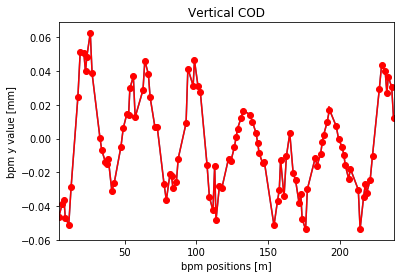

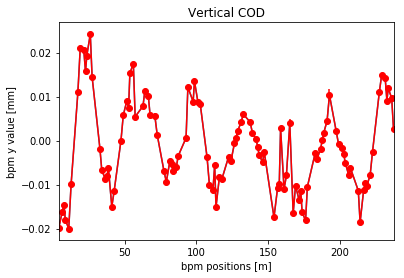

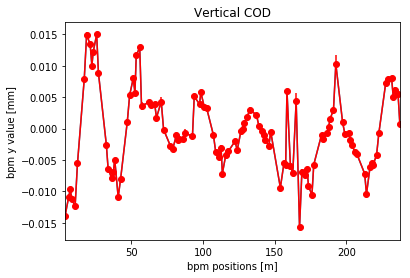

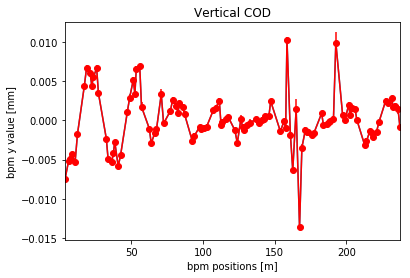

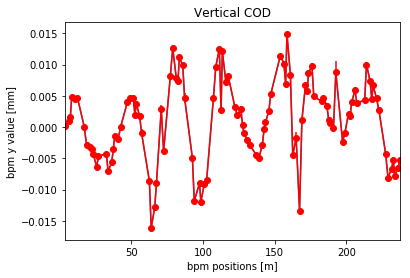

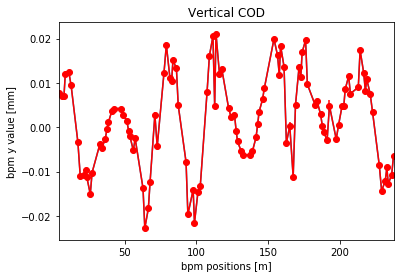

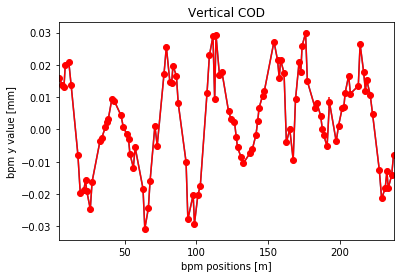

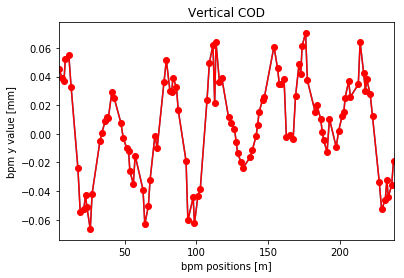

In [14]:

fig=figure(figsize=(15,7))

#PLOt all the 8 CODs
for i in range(a):
    print(i)
    #plt.figure()
    fig=figure(figsize=(15,7))
    errorbar(posi,COD[i],yerr= st[i] ,fmt= 'o-',color='r') 
    plot(posi,COD[i])##
    title('Vertical COD')
    xlabel('bpm positions [m]')
    ylabel('bpm y value [mm]')
    xlim(min(posi),max(posi))    
    plt.show
    fname=path2+'COD_Gap_'+str(exNO)
    fig.savefig(str(fname)+'.png')

In [ ]:
c=3e8

I1=4e-3
I2=20e-3
v=0.99997*3e8 
nb=4  #number of bunches
t=240/(v*nb)
dq=(I2-I1)/t  # d bunch charges

e=1.60217662e-19
E=1.7e9*e

bet0=1  #Betatron function at s
mu0=2    #Betatron Phase advance at s0
y0=0.9e-3   #bump size


In [ ]:
#  LOAD the LATTICE ***************

lattice= pd.read_csv(path1+'20200121_BESSYIIopticalfunctions.csv')
bety=(lattice.BETY).values

muy=(lattice.MUY).values

s=(lattice.S).values

#type(lattice) = pandas.core.frame.DataFrame
#type(bmdta)  =   type(s)=numpy.ndarray

#plot(s,muy)

In [ ]:
#Fit Function......to DO  ..........

def fity(y,ky):
    return (dq/(E/e))*ky*y0*(sqrt(bety*bet0))*cos(abs(muy-mu0)-pi*nuy[i])
init_vals = [200]  # for [amp, cen, wid]
best_vals, covar = curve_fit(fity, s, y, p0=init_vals)
print('best_vals: {}'.format(best_vals))    

In [ ]:

ky=[2.0, 3 , 4 ]

i=1

yfit=((dq/(E/e))*ky[i]*y0*(sqrt(bety*bet0))*cos(abs(muy-mu0)-pi*nuy[i]))


In [ ]:
plot (s,yfit,'r')
#plot (x,y)

In [ ]:
#Theory :

'  (y2 hi -y1 li ) WIB  - (y20  hi-y10  li) NOB

    where y01 (low) and y02 (high) are measured without the bump at the
    low and high values of the beam current.

    Then, after the  bump is generated, y1  and y2  are measured once again at
    the same values of the beam current. 
'

